This notebook is used to load the data from https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries, clean it up and save it in salaries_cyber_us_cleaned.csv

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing data

In [307]:
# Dataset: https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries
df = pd.read_csv("salaries_cyber.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [308]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


## Countries

In [309]:
top_10_countries = df.groupby("company_location").count().sort_values(by="work_year", ascending=False).head(10).iloc[:, 1]
top_10_countries

company_location
US    882
GB     57
CA     51
DE     33
IN     23
AU     21
FR     19
CH     14
NL     13
BR     12
Name: experience_level, dtype: int64

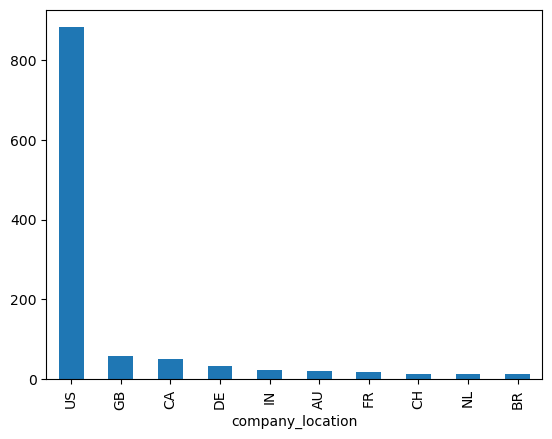

In [310]:
top_10_countries.plot(kind="bar");

We can see most of the salaries are from the U.S. As most of the data is from the US, we will only consider US.

## When was the data for US collected?

In [311]:
df_us = df[ df["company_location"] == "US" ]
df_us.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
5,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L
6,2022,SE,FT,Security Researcher,220000,USD,220000,US,100,US,M


In [312]:
df_us.loc[:, "work_year"].min()

2020

In [313]:
df_us.loc[:, "work_year"].max()

2022

We have data between 2020 and 2022.

## Analyzing job titles

In [314]:
us_job_titles = df_us["job_title"]
us_job_titles.head()

0             Cyber Program Manager
1                  Security Analyst
2                  Security Analyst
5    Application Security Architect
6               Security Researcher
Name: job_title, dtype: object

In [315]:
len( us_job_titles.unique() )

78

In this data set there are 78 different job titles.

In [316]:
us_job_titles.value_counts()

Security Engineer                          161
Cyber Security Analyst                      90
Cyber Security Engineer                     48
Information Security Manager                45
Security Analyst                            44
                                          ... 
Computer Forensic Software Engineer          1
Principal Application Security Engineer      1
Application Security Specialist              1
Application Security Architect               1
Security Officer 3                           1
Name: job_title, Length: 78, dtype: int64

We can see that most of the roles are Security Engineer roles. Also there are multiple job titles that describe the same jobs, e.g. Security Engineer and Cyber Security Engineer. So we have to clean the data.

# Cleaning US Data

## Cleaning Job Titles

Cleaning job titles to more general job titles:

In [317]:
def clean_job_titles(title: str):
    title = title.replace("Cyber ", "")
    title = title.replace("IT ", "")

    if title in ["Detection Engineer", "IAM Engineer", "Product Security Engineer", "Computer Forensic Software Engineer", "Offensive Security Engineer", "Azure Security Engineer", "Infrastructure Security Engineer", "Corporate Security Engineer", "Staff Security Engineer", "Lead Information Security Engineer", "Principal Cloud Security Engineer", "Network and Security Engineer", "Software Security Engineer", "Cloud Security Engineer", "DevOps Security Engineer", "Information Security Engineer", "Application Security Engineer", "Staff Application Security Engineer", "Principal Application Security Engineer", "Principal Security Engineer", "Information Systems Security Engineer", "Enterprise Security Engineer", "Network Security Engineer", "Lead Security Engineer"]:
        return "Security Engineer"
    
    elif title in ["Information Security Analyst", "Data Security Analyst", "Application Security Analyst", "SOC Analyst", "Security Operations Analyst"]:
        return "Security Analyst"
    
    elif title in ["Vulnerability Management Engineer", "Vulnerability Analyst"]:
        return "Vulnerability Management"
    
    elif title in ["Application Security Specialist", "Information Security Specialist", "Security Training Specialist"]:
        return "Security Specialist"
    
    elif title in ["Security Officer 3", "Security Officer", "Information Security Officer"]:
        return "Chief Information Security Officer"
    
    elif title in ["Application Security Architect", "Cloud Security Architect", "Information Security Architect"]:
        return "Security Architect"
    
    elif title in ["Penetration Testing Engineer", "Ethical Hacker"]:
        return "Penetration Tester"
    
    elif title in ["Security Incident Response Engineer", "Incident Response Analyst", "Digital Forensics Analyst"]:
        return "Incident Response"
    
    elif title in ["DevSecOps Engineer", "DevSecOps Engineer", "Security DevOps Engineer"]:
        return "DevSecOps"
    
    elif title in ["Threat Intelligence Response Analyst", "Threat Analyst", "Threat Intelligence Analyst"]:
        return "Threat Intelligence"
    
    elif title in ["Security Engineering Manager", "Program Manager", "Privacy Manager", "Information Security Compliance Manager", "Incident Response Manager", "Incident Response Lead", "Information Security Manager"]:
        return "Security Manager"
    
    elif title in ["Head of Security", "Director of Information Security", "Head of Information Security"]:
        return "Security Director"
    
    elif title in ["Vulnerability Researcher"]:
        return "Security Researcher"
    
    return title

In [318]:
df_us["job_title"] = df_us.loc[:, "job_title"].apply( lambda title: clean_job_titles(title) )
df_us.loc[:, "job_title"].unique()

C:\Users\fahri\AppData\Local\Temp\ipykernel_10724\2848835057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us["job_title"] = df_us.loc[:, "job_title"].apply( lambda title: clean_job_titles(title) )


array(['Security Manager', 'Security Analyst', 'Security Architect',
       'Security Researcher', 'Security Specialist',
       'Security Consultant', 'Security Director', 'Incident Response',
       'DevSecOps', 'Security Engineer', 'Vulnerability Management',
       'Penetration Tester', 'Threat Intelligence',
       'Chief Information Security Officer'], dtype=object)

In [319]:
df_us.groupby("job_title").count().sort_values(by="work_year")

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
job_title,,,,,,,,,,
Security Consultant,10,10,10,10,10,10,10,10,10,10
Vulnerability Management,10,10,10,10,10,10,10,10,10,10
Security Director,16,16,16,16,16,16,16,16,16,16
Incident Response,21,21,21,21,21,21,21,21,21,21
Security Researcher,22,22,22,22,22,22,22,22,22,22
DevSecOps,23,23,23,23,23,23,23,23,23,23
Security Architect,31,31,31,31,31,31,31,31,31,31
Chief Information Security Officer,33,33,33,33,33,33,33,33,33,33
Security Specialist,38,38,38,38,38,38,38,38,38,38


## Removing unnecessary columns

In [320]:
df_us.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Security Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
5,2022,EX,FT,Security Architect,315000,USD,315000,US,100,US,L
6,2022,SE,FT,Security Researcher,220000,USD,220000,US,100,US,M


In [321]:
df_us["company_location"].unique()

array(['US'], dtype=object)

In [327]:
df_us["employee_residence"].value_counts()

US    853
CA      6
IN      4
DE      3
FR      2
AU      2
ES      2
GH      1
PK      1
JP      1
AE      1
PT      1
NL      1
BR      1
GR      1
GB      1
CR      1
Name: employee_residence, dtype: int64

In [328]:
df_us["employment_type"].value_counts()

FT    872
CT      5
PT      4
FL      1
Name: employment_type, dtype: int64

In [323]:
df_us.drop(labels=["salary_currency", "salary_in_usd", "company_location"], axis=1)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,FT,Security Manager,63000,US,50,S
1,2022,MI,FT,Security Analyst,95000,US,0,M
2,2022,MI,FT,Security Analyst,70000,US,0,M
5,2022,EX,FT,Security Architect,315000,US,100,L
6,2022,SE,FT,Security Researcher,220000,US,100,M
...,...,...,...,...,...,...,...,...
1238,2020,SE,FT,Security Specialist,170000,US,100,L
1239,2021,SE,FT,Security Engineer,135000,US,100,L
1240,2021,EN,FT,Security Analyst,100000,US,50,M
1244,2021,SE,FT,Penetration Tester,126000,US,100,L


In [329]:
df_us.drop(labels=["salary_currency", "salary_in_usd", "company_location"], axis=1, inplace=True)
df_us.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_10724\292729114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.drop(labels=["salary_currency", "salary_in_usd", "company_location"], axis=1, inplace=True)


,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,FT,Security Manager,63000,US,50,S
1,2022,MI,FT,Security Analyst,95000,US,0,M
2,2022,MI,FT,Security Analyst,70000,US,0,M
5,2022,EX,FT,Security Architect,315000,US,100,L
6,2022,SE,FT,Security Researcher,220000,US,100,M


In [330]:
df_us.to_csv("salaries_cyber_us_cleaned.csv")